# 기계학습 Assignment 1 (09.19)

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Machine Learning]

- 제출은 `이름(학번).ipynb` 파일과 `이름(학번).html`파일 2개를 제출할 것. 
- ipynb 혹은 html 파일을 이용한 제출이 익숙하지 않은 학생은 질문할 것. 

In [1]:
from fastai.vision.all import * 
from fastai.collab import * 
from fastai.text.all import *

In [187]:
!nvidia-smi

Fri Sep 23 23:42:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.46       Driver Version: 495.46       CUDA Version: 11.5     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:65:00.0 Off |                  N/A |
|  0%   39C    P8    27W / 420W |  10309MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## `1`. 이미지자료분석 

아래를 이용하여 MNIST_SAMPLE 이미지 자료를 다운로드 받고 dls오브젝트를 만들어라. 

In [123]:
path = untar_data(URLs.MNIST_SAMPLE)

In [124]:
dls = ImageDataLoaders.from_folder(path) 

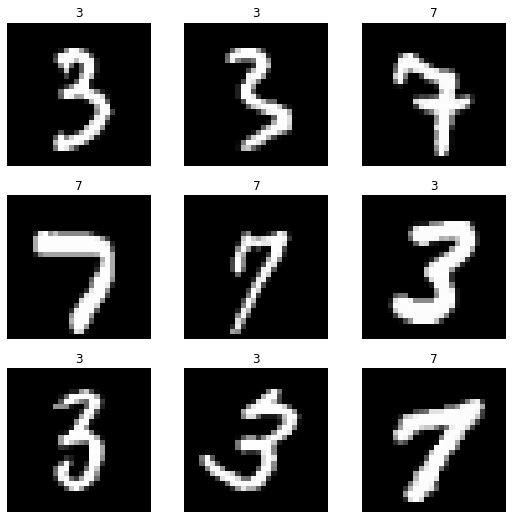

In [125]:
dls.show_batch()

`(1)` cnn_learner를 이용하여 lrnr 오브젝트를 생성하라. 
- arch 는 resnet34 로 설정할 것 
- metrics 는 error_rate 로 설정할 것 

In [127]:
lrnr = cnn_learner(dls,resnet34,metrics=accuracy)

`(2)` fine_tune 을 이용하여 lrnr 오브젝트를 학습하라. 

In [128]:
lrnr.fine_tune(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.302672,0.142502,0.950932,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.040394,0.020423,0.991168,00:10


`(3)` 아래를 이용하여 X,y를 만들어라. 

```python
X,y = dls.one_batch()
```

X,y의 shape을 조사하라. X에는 몇개의 이미지가 있는가? 이미지의 size는 얼마인가? 

In [129]:
X,y = dls.one_batch()

In [130]:
X.shape

torch.Size([64, 3, 28, 28])

**Answer**
- X에는 64개의 이미지가 들어있다.
- image size는 28 $\times$ 28 이다.

In [131]:
y.shape

torch.Size([64])

`(4)` 아래의 코드를 이용하여 X의 두번째 이미지가 어떠한 숫자를 의미하는지 확인하라. (그림보고 3인지 7인지 확인하여 답을 쓸 것)
```python
show_image(X[0])
```

그리고 show_image가 정의된 파일의 경로를 확인하고 show_image가 python 내장함수 인지, torch에서 지원하는 함수인지 fastai에서 지원하는 함수인지 파악하라. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

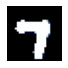

In [132]:
show_image(X[1])

**Answer**
- X의 2번째 이미지는 7이다.

In [133]:
?X

Type:            TensorImage
String form:    
TensorImage([[[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
           [-2.1179,  <...>          [-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044]]]],
           device='cuda:0')
Length:          64
File:            ~/anaconda3/envs/csy/lib/python3.8/site-packages/fastai/torch_core.py
Docstring:       <no docstring>
Class docstring: A `Tensor` which support subclass pickling, and maintains metadata when casting or after methods


**Answer**
- fastai에서 지원하는 함수임을 확인하였다.

`(5)` lrnr 오브젝트를 이용하여 AI가 X[0]을 어떤 값으로 판단하는지 확인하라. 올바르게 판단하였는가? 올바르게 판단했다면 몇 프로의 확신으로 판단하였는가?

In [134]:
lrnr.model(X[0:1])

TensorBase([[-3.3856,  4.0050]], device='cuda:0', grad_fn=<AliasBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

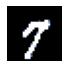

In [135]:
show_image(X[0])

**Answer**
- 왼쪽이 크면 3으로 판단
- 오른쪽이 크면 7으로 판단

In [136]:
lrnr.model(X[1:2])

TensorBase([[-3.0025,  1.7983]], device='cuda:0', grad_fn=<AliasBackward0>)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<AxesSubplot:>

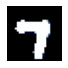

In [137]:
show_image(X[1])

- y 값 의미 : 3이 0, 7이 1

**Answer**
-  %의 확신...

In [138]:
X[0].shape

torch.Size([3, 28, 28])

In [147]:
lrnr.model(X[0:1])

TensorBase([[-3.3856,  4.0050]], device='cuda:0', grad_fn=<AliasBackward0>)

### 질문?

fine_tune 결과로, 99%?

## `2`. 추천시스템

아래를 이용하여 rcmd_anal.csv 를 다운로드 받고 dls오브젝트를 만들어라.

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv')

In [54]:
df

,user,item,rating,item_name
0,1,15,1.084308,홍차5
1,1,1,4.149209,커피1
2,1,11,1.142659,홍차1
3,1,5,4.033415,커피5
4,1,4,4.078139,커피4
...,...,...,...,...
995,100,18,4.104276,홍차8
996,100,17,4.164773,홍차7
997,100,14,4.026915,홍차4
998,100,4,0.838720,커피4


`(2)` dls와 lrnr 오브젝트를 생성하고 lrnr 오브젝트를 학습하라. 

In [55]:
dls = CollabDataLoaders.from_df(df)

In [56]:
dls.show_batch()

,user,item,rating
0,14,17,1.001649
1,76,1,1.216447
2,87,16,4.172413
3,66,3,1.094215
4,17,17,1.096392
5,31,9,3.994691
6,86,10,0.878860
7,91,8,0.998725
8,15,20,0.839126
9,43,11,0.614789


In [57]:
X,y = dls.one_batch()

In [58]:
lrnr = collab_learner(dls,y_range = (0,5))

In [59]:
lrnr.fit(30)

epoch,train_loss,valid_loss,time
0,2.310743,2.351605,00:00
1,2.306513,2.347171,00:00
2,2.294810,2.328208,00:00
3,2.275643,2.280786,00:00
4,2.242993,2.193831,00:00
5,2.186889,2.060993,00:00
6,2.103963,1.884362,00:00
7,1.993417,1.670821,00:00
8,1.854657,1.435888,00:00
9,1.696534,1.191992,00:00


`(1)` 73번 유저가 먹은 아이템 및 평점을 출력하는 코드를 작성하라. 이를 기반으로 73번 유저가 어떠한 취향인지 파악하라. 

In [88]:
df.query("user==73").sort_values("rating")

,user,item,rating,item_name
728,73,6,0.868370,커피6
726,73,1,0.887292,커피1
724,73,2,0.943742,커피2
727,73,7,0.947641,커피7
722,73,9,1.119541,커피9
725,73,4,1.152405,커피4
720,73,20,3.733853,홍차10
723,73,13,3.840801,홍차3
729,73,17,3.873590,홍차7
721,73,18,3.975004,홍차8


**Answer**
- 73번 유저는 커피를 마셨을때, 평점이 낮았으며, 홍차를 마셨을때 평점이 높은 것으로 보아
- 커피보다 홍차를 좋아한다.

`(3)` 아래와 같은 데이터 프레임을 생성하고 df_new 에 저장하라. 

In [62]:
#hide
import IPython 
_html='<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>user</th>\n      <th>item</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>73</td>\n      <td>1</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>73</td>\n      <td>2</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>73</td>\n      <td>3</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>73</td>\n      <td>4</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>73</td>\n      <td>5</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>73</td>\n      <td>6</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>73</td>\n      <td>7</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>73</td>\n      <td>8</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>73</td>\n      <td>9</td>\n    </tr>\n    <tr>\n      <th>9</th>\n      <td>73</td>\n      <td>10</td>\n    </tr>\n    <tr>\n      <th>10</th>\n      <td>73</td>\n      <td>11</td>\n    </tr>\n    <tr>\n      <th>11</th>\n      <td>73</td>\n      <td>12</td>\n    </tr>\n    <tr>\n      <th>12</th>\n      <td>73</td>\n      <td>13</td>\n    </tr>\n    <tr>\n      <th>13</th>\n      <td>73</td>\n      <td>14</td>\n    </tr>\n    <tr>\n      <th>14</th>\n      <td>73</td>\n      <td>15</td>\n    </tr>\n    <tr>\n      <th>15</th>\n      <td>73</td>\n      <td>16</td>\n    </tr>\n    <tr>\n      <th>16</th>\n      <td>73</td>\n      <td>17</td>\n    </tr>\n    <tr>\n      <th>17</th>\n      <td>73</td>\n      <td>18</td>\n    </tr>\n    <tr>\n      <th>18</th>\n      <td>73</td>\n      <td>19</td>\n    </tr>\n    <tr>\n      <th>19</th>\n      <td>73</td>\n      <td>20</td>\n    </tr>\n  </tbody>\n</table>'
IPython.display.HTML(_html)

,user,item
0,73,1
1,73,2
2,73,3
3,73,4
4,73,5
5,73,6
6,73,7
7,73,8
8,73,9
9,73,10


In [99]:
user73 = []

In [100]:
for i in range(1,21):
    user73.append(73)

In [101]:
item20 = []

In [102]:
for i in range(1,21):
    item20.append(i)

In [104]:
df_new = pd.DataFrame({'user':user73,'item':item20})

In [105]:
df_new

,user,item
0,73,1
1,73,2
2,73,3
3,73,4
4,73,5
5,73,6
6,73,7
7,73,8
8,73,9
9,73,10


`(4)` 아래의 코드를 이용하여 73번 유저의 취향을 파악하라. 73번 유저가 커피3, 커피5를 먹는다면 얼마정도의 평점을 줄 것이라 예측되는가? 

```Python
_dl = dls.test_dl(df_new)
lrnr.get_preds(dl=_dl)
```


In [106]:
dl = dls.test_dl(df_new)

In [107]:
lrnr.get_preds(dl=dl)

(tensor([1.0069, 1.0587, 1.0309, 1.0215, 1.0226, 1.0065, 1.0134, 1.0148, 1.0413,
         0.9935, 3.7692, 3.9378, 3.9076, 3.9178, 3.9402, 3.9270, 3.8456, 3.9687,
         3.8791, 3.9234]),
 None)

**Answer**
- 커피10개, 홍차10개 순
- 커피 3을 마셨을 때 1.0309의 평점을 줬을 것으로 예측된다.
- 커피 5를 마셨을때 1.0226의 평점을 줬을 것으로 예측된다.

## `3`. 시퀀스자료분석

아래를 이용하여 자료를 다운로드 받아라. 

In [200]:
df = pd.read_csv('https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-19-human_numbers_100.csv')

In [201]:
df

,Unnamed: 0,text
0,0,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1,1,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
2,2,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
3,3,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
4,4,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
...,...,...
1995,1995,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seve..."
1996,1996,"one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thi

`(1)` TextDataLoaders.from_df을 이용하여 dls오브젝트를 만들어라. 
- is_lm = True 로 설정할 것 
- seq_len = 5 로 설정할 것 

In [202]:
dls = TextDataLoaders.from_df(df,text_col='text',ls_lm=True,seq_len=5)

In [203]:
dls.show_batch(max_n=5)

,text,category
0,"xxbos one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve , thirteen , fourteen , fifteen , sixteen , seventeen , eighteen , nineteen , twenty , twenty one , twenty two , twenty three , twenty four , twenty five , twenty six , twenty seven , twenty eight , twenty nine , thirty , thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , thirty eight , thirty nine , forty , forty one , forty two , forty three , forty four , forty five , forty six , forty seven , forty eight , forty nine , fifty , fifty one , fifty two , fifty three , fifty four , fifty five , fifty six , fifty seven , fifty","one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seven, fifty eight, fifty nine, sixty, sixty one, sixty two, sixty three, sixty four, sixty five, sixty six, sixty seven, sixty eight, sixty nine, seventy, seventy one, seventy two, seventy three, seventy four, seventy five, seventy six, seventy seven, seventy eight, seventy nine, eighty, eighty one, eighty two, eighty three, eighty four, eighty five, eighty six, eighty seven, eighty eight, eighty nine, ninety, ninety one, ninety two, ninety three, ninety four, ninety five, ninety six, ninety seven, ninety eight, ninety nine, one hundred"
1,"xxbos one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve , thirteen , fourteen , fifteen , sixteen , seventeen , eighteen , nineteen , twenty , twenty one , twenty two , twenty three , twenty four , twenty five , twenty six , twenty seven , twenty eight , twenty nine , thirty , thirty one , thirty two , thirty three , thirty four , thirty five , thirty six , thirty seven , thirty eight , thirty nine , forty , forty one , forty two , forty three , forty four , forty five , forty six , forty seven , forty eight , forty nine , fifty , fifty one , fifty two , fifty three , fifty four , fifty five , fifty six , fifty seven , fifty","one, two, three, four, five, six, seven, eight, nine, ten, eleven, twelve, thirteen, fourteen, fifteen, sixteen, seventeen, eighteen, nineteen, twenty, twenty one, twenty two, twenty three, twenty four, twenty five, twenty six, twenty seven, twenty eight, twenty nine, thirty, thirty one, thirty two, thirty three, thirty four, thirty five, thirty six, thirty seven, thirty eight, thirty nine, forty, forty one, forty two, forty three, forty four, forty five, forty six, forty seven, forty eight, forty nine, fifty, fifty one, fifty two, fifty three, fifty four, fifty five, fifty six, fifty seven, fifty eight, fifty nine, sixty, sixty one, sixty two, sixty three, sixty four, sixty five, sixty six, sixty seven, sixty eight, sixty nine, seventy, seventy one, seventy two, seventy three, seventy four, seventy five, seventy six, seventy seven, seventy eight, seventy nine, eighty, eighty one, eighty two, eighty three, eighty four, eighty five, eighty six, eighty seven, eighty eight, eighty nine, ninety, ninety one, ninety two, ninety three, ninety four, ninety five, ninety six, ninety seven, ninety eight, ninety nine, one hundred"
2,"xxbos one , two , three , four , five , six , seven , eight , nine , ten , eleven , twelve , thirteen , fourteen , fifteen , sixteen , seventeen , eighteen , nineteen , twenty , twenty one , twenty two , twenty three , twenty four , twenty five , twenty six , twenty seven , twenty eight , twenty nine , thirty , thirty one , thirty two , thirty three , thirty f

`(2)` lrnr 오브젝트를 만들어라. 
- arch = AWD_LSTM 이용 
- metrics = accuracy 이용 

In [194]:
lrnr = language_model_learner(dls,arch=AWD_LSTM,metrics=accuracy)

`(3)` lrnr오브젝트에서 fine_tune(3) 메소드를 이용하여 모형을 학습하라. 

### 질문?

In [ ]:
lrnr.fine_tune(3)

`(4)` 'one , two ,' 이후에 이어질 50개의 단어를 생성하라.

In [ ]:
lrnr.predict('one, two,',n_words=59)

`(5)` 'twenty , twenty one , ' 이후에 이어질 50개의 단어를 생성하라. 

In [ ]:
lrnr.predict('twenty, twenty one, ',n_words=50)

## `4`. 리눅스명령어

Collab 에서 (혹은 리눅스기반 서버에서) 아래의 명령어를 순서대로 실행해보라. 
```
!ls
!ls -a 
!ls .
!ls .. 
!ls sample
!mkdir asdf 
!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv
!cp 2022-09-08-rcmd_anal.csv ./asdf 
!ls ./asdf 
!rm 2022-09-08-rcmd_anal.csv 
!rm -rf asdf 
```

각 명령들이 무엇을 의미하는지 간단히 서술하라. 

`!ls` list를 나타낸다.

`!ls -a` 숨겨진 list까지 모두 보여준다.

`!ls .` 현재 위치에 있는 모든 list를 보여준다.(숨겨진 list 포함(

`!ls ..` 상위 폴더 위치에 있는 list를 보여준다.

`!ls sample` sample이라는 파일 혹은 directory에 접근한다.

`!mkdir asdf` asdf라는 이름의 directory를 만들어준다.

`!wget https://raw.githubusercontent.com/guebin/DL2022/master/_notebooks/2022-09-08-rcmd_anal.csv` 해당 주소에 있는 데이터를 다운받을 수 있다.

`!cp 2022-09-08-rcmd_anal.csv ./asdf` asdf directory에 있는 해당 폴더를 복사한다.

`!ls ./asdf` asdf directory에 있는 list를 보여준다.

`!rm 2022-09-08-rcmd_anal.csv` 해당 파일을 지운다.

`!rm -rf asdf` asdf directory를 삭제한다. directory를 삭제할때에는 -rf, file을 삭제할때는 -f 입력해준다.